In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#Dataset 1
df = pd.read_csv('BankChurners.csv')
df = df.iloc[: , 1:-2]
df['Attrition_Flag'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
df['Gender'] = df['Gender'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')
df = pd.get_dummies(df, columns = ['Gender','Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category'], drop_first=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

In [109]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

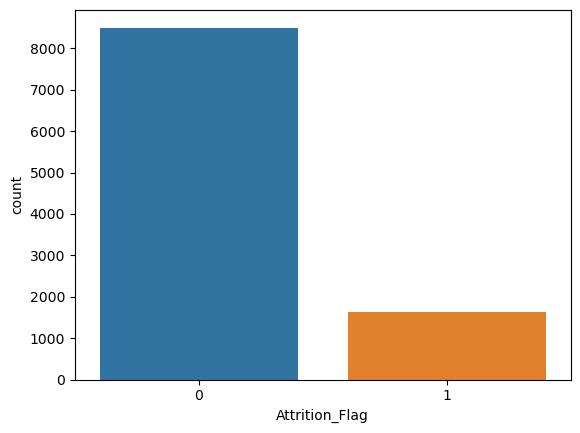

In [113]:
sns.countplot(data = df, x='Attrition_Flag') #Classic imbalance

<AxesSubplot:>

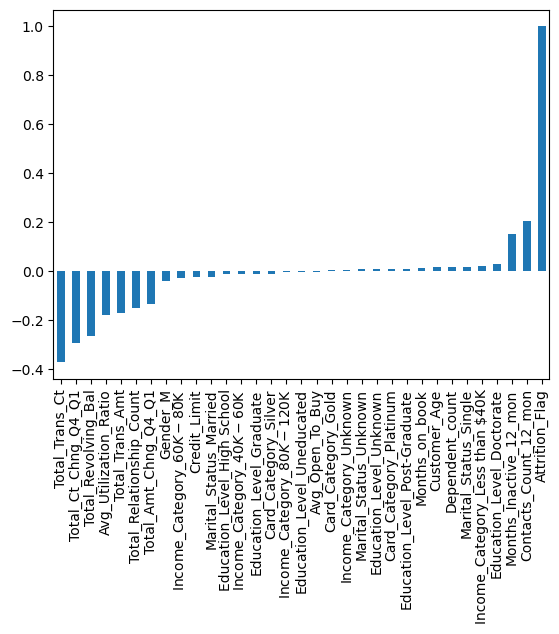

In [112]:
df.corr()['Attrition_Flag'].sort_values().plot(kind='bar')


In [114]:
X = df.drop('Attrition_Flag', axis=1).values
y = df['Attrition_Flag'].values

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [119]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = LR_classifier.predict(X_test)

In [121]:
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2568
           1       0.79      0.54      0.64       471

    accuracy                           0.91      3039
   macro avg       0.86      0.76      0.79      3039
weighted avg       0.90      0.91      0.90      3039

{'TN': 2501, 'TP': 255, 'FP': 67, 'FN': 216}


In [122]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
y_pred = DT_classifier.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2568
           1       0.80      0.79      0.79       471

    accuracy                           0.94      3039
   macro avg       0.88      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039

{'TN': 2477, 'TP': 370, 'FP': 91, 'FN': 101}


In [123]:
KNN_classifier = KNeighborsClassifier(n_neighbors=35)
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2568
           1       0.87      0.03      0.05       471

    accuracy                           0.85      3039
   macro avg       0.86      0.51      0.49      3039
weighted avg       0.85      0.85      0.78      3039

{'TN': 2566, 'TP': 13, 'FP': 2, 'FN': 458}


In [124]:
SVC_classifier = SVC()
SVC_classifier.fit(X_train, y_train)
y_pred = SVC_classifier.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2568
           1       0.84      0.49      0.62       471

    accuracy                           0.91      3039
   macro avg       0.88      0.73      0.78      3039
weighted avg       0.90      0.91      0.90      3039

{'TN': 2525, 'TP': 229, 'FP': 43, 'FN': 242}


In [126]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2568
           1       0.94      0.77      0.84       471

    accuracy                           0.96      3039
   macro avg       0.95      0.88      0.91      3039
weighted avg       0.96      0.96      0.95      3039

{'TN': 2543, 'TP': 362, 'FP': 25, 'FN': 109}


In [128]:
#Dataset 2
new_df = df.iloc[:, :15]
new_df = new_df.drop(columns='Avg_Open_To_Buy')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

In [129]:
X = new_df.drop('Attrition_Flag', axis=1).values
y = new_df['Attrition_Flag'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2568
           1       0.94      0.82      0.87       471

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.93      3039
weighted avg       0.96      0.96      0.96      3039

{'TN': 2542, 'TP': 385, 'FP': 26, 'FN': 86}


In [130]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=121)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
old_a = sum(y_train == 1)
old_e = sum(y_train == 0)
new_a = sum(y_train_res == 1)
new_e = sum(y_train_res == 0)

print(f"Before oversampling, Attrited customers or label '1': {old_a}")
print(f"Before oversampling, Existing customers or label '0': {old_e} \n")

  
print(f"After oversampling, Attrited customers or label '1': {new_a}")
print(f"After overSampling, Existing customers or label '0': {new_e}")

print(f'Oversampled training data size: {X_train_res.shape[0]}')

Before oversampling, Attrited customers or label '1': 1156
Before oversampling, Existing customers or label '0': 5932 

After oversampling, Attrited customers or label '1': 5932
After overSampling, Existing customers or label '0': 5932
Oversampled training data size: 11864


In [131]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2568
           1       0.87      0.85      0.86       471

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039

{'TN': 2509, 'TP': 402, 'FP': 59, 'FN': 69}


In [133]:
#Dataset 3
df = pd.read_csv('BankChurners.csv')
df = df[(df != 'Unknown').all(1)]
df = df.iloc[: , 1:-2]
df['Attrition_Flag'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
df['Gender'] = df['Gender'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')
df = pd.get_dummies(df, columns = ['Gender','Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category'], drop_first=True)
new_df = df.iloc[:, :15]
new_df = new_df.drop(columns='Avg_Open_To_Buy')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Customer_Age              7081 non-null   int64  
 2   Dependent_count           7081 non-null   int64  
 3   Months_on_book            7081 non-null   int64  
 4   Total_Relationship_Count  7081 non-null   int64  
 5   Months_Inactive_12_mon    7081 non-null   int64  
 6   Contacts_Count_12_mon     7081 non-null   int64  
 7   Credit_Limit              7081 non-null   float64
 8   Total_Revolving_Bal       7081 non-null   int64  
 9   Total_Amt_Chng_Q4_Q1      7081 non-null   float64
 10  Total_Trans_Amt           7081 non-null   int64  
 11  Total_Trans_Ct            7081 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1       7081 non-null   float64
 13  Avg_Utilization_Ratio     7081 non-null   float64
dtypes: floa

In [134]:
X = new_df.drop('Attrition_Flag', axis=1).values
y = new_df['Attrition_Flag'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1812
           1       0.93      0.81      0.86       313

    accuracy                           0.96      2125
   macro avg       0.95      0.90      0.92      2125
weighted avg       0.96      0.96      0.96      2125

{'TN': 1793, 'TP': 252, 'FP': 19, 'FN': 61}


In [135]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=121)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
old_a = sum(y_train == 1)
old_e = sum(y_train == 0)
new_a = sum(y_train_res == 1)
new_e = sum(y_train_res == 0)

print(f"Before oversampling, Attrited customers or label '1': {old_a}")
print(f"Before oversampling, Existing customers or label '0': {old_e} \n")

  
print(f"After oversampling, Attrited customers or label '1': {new_a}")
print(f"After overSampling, Existing customers or label '0': {new_e}")

print(f'Oversampled training data size: {X_train_res.shape[0]}')

Before oversampling, Attrited customers or label '1': 800
Before oversampling, Existing customers or label '0': 4156 

After oversampling, Attrited customers or label '1': 4156
After overSampling, Existing customers or label '0': 4156
Oversampled training data size: 8312


In [137]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
d = {}
d['TN'] = mat[0][0]
d['TP'] = mat[1][1]
d['FP'] = mat[0][1]
d['FN'] = mat[1][0]
print(d)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1812
           1       0.87      0.86      0.86       313

    accuracy                           0.96      2125
   macro avg       0.92      0.92      0.92      2125
weighted avg       0.96      0.96      0.96      2125

{'TN': 1773, 'TP': 268, 'FP': 39, 'FN': 45}
